## Chapter 11. 데이터 시각화 (Visualization)

### 01. 분석의 목적
- Matplotlib과 seaborn을 사용하여 다양한 형태의 Visualization 만들기

### 02. Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 5, 10)

x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [3]:
y = x ** 2

Text(0.5,1,'Plot Title')

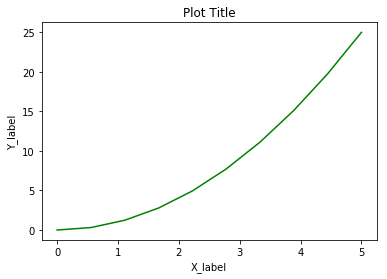

In [4]:
plt.plot(x, y, 'g')
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.title('Plot Title')

Text(0.5,1,'Plot Title')

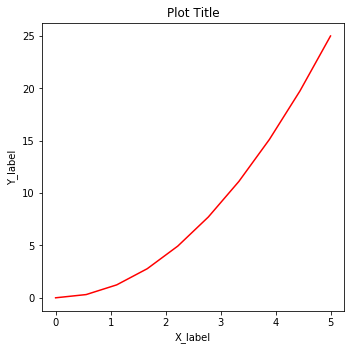

In [5]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.7, 1])

axes.plot(x, y, 'r')
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.title('Plot Title')

Text(0.5,1,'Plot Title 2')

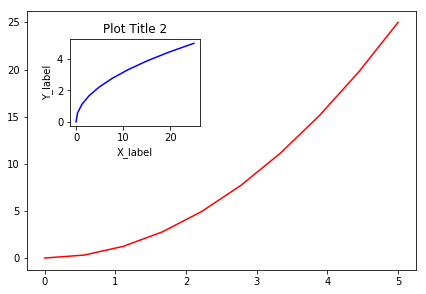

In [6]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes2 = fig.add_axes([0.2, 0.6, 0.3, 0.3])

axes1.plot(x, y, 'r')
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.title('Plot Title 1')

axes2.plot(y, x, 'b')
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.title('Plot Title 2')

Text(0.5,1,'Plot Title')

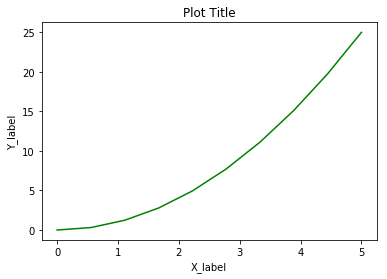

In [7]:
fig, ax = plt.subplots()

ax.plot(x, y, 'g')
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.title('Plot Title')

Text(0.5,1,'Title_2')

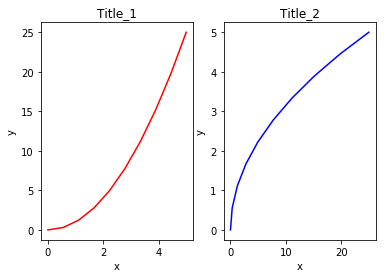

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(x, y, 'r')
ax[1].plot(y, x, 'b')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Title_1')

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Title_2')

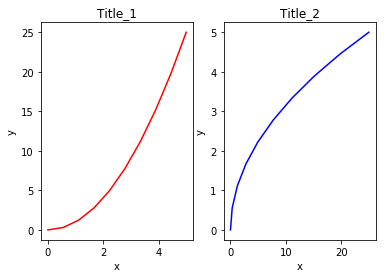

In [9]:
fig

In [10]:
fig.savefig('my_name.png')

### 03. Distribition Plot

In [11]:
import seaborn as sns

data = sns.load_dataset('tips')

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


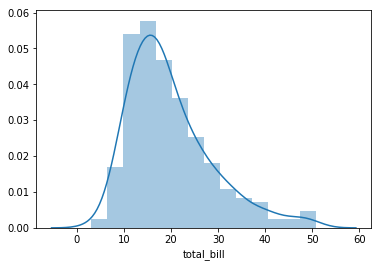

In [12]:
sns.distplot(data['total_bill'])

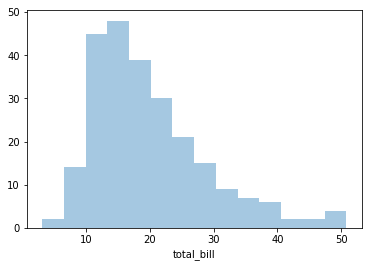

In [13]:
sns.distplot(data['total_bill'], kde=False)

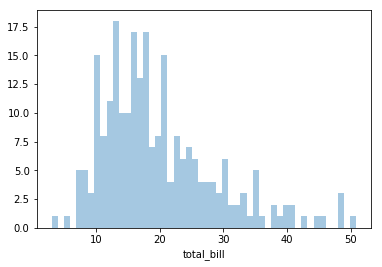

In [14]:
sns.distplot(data['total_bill'], kde=False, bins=50)

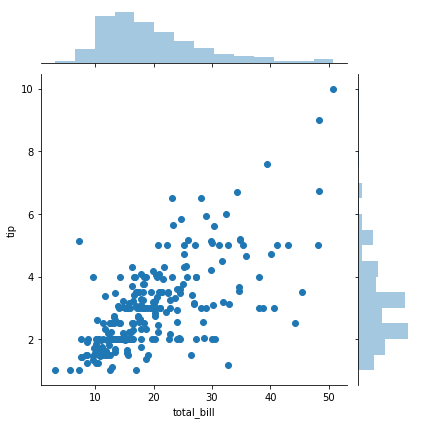

In [15]:
sns.jointplot(x='total_bill', y='tip', data=data)

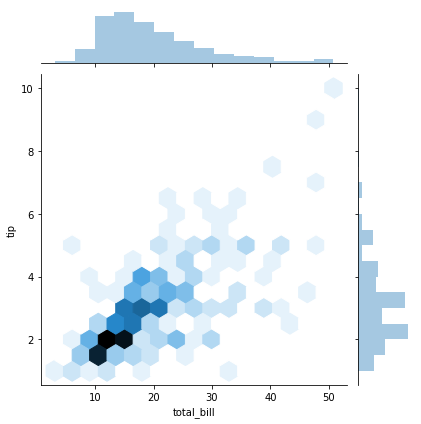

In [16]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='hexagon')

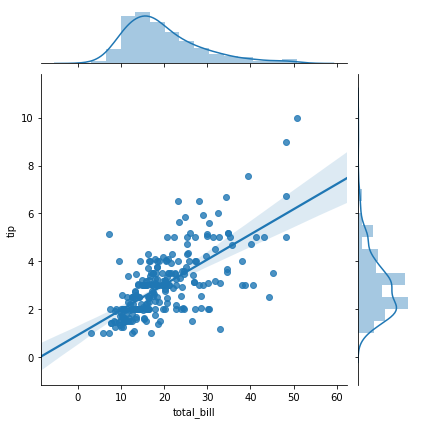

In [17]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='regression')

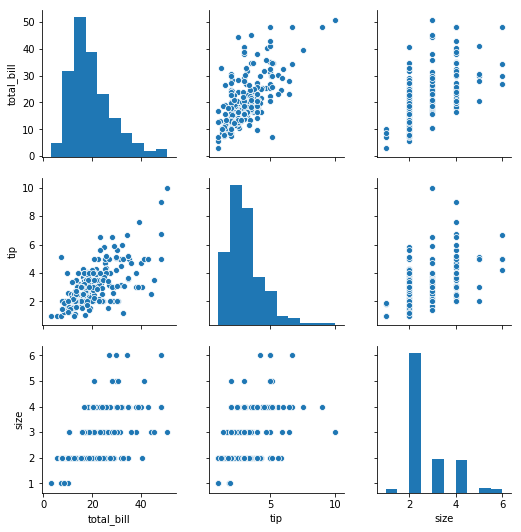

In [18]:
sns.pairplot(data)

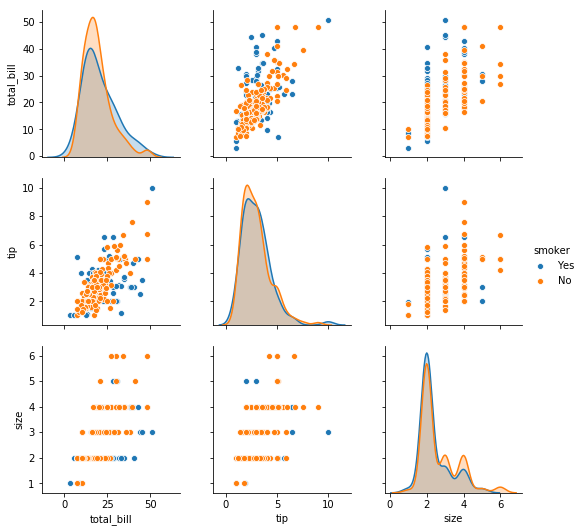

In [19]:
sns.pairplot(data, hue='smoker')

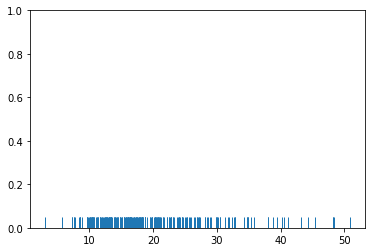

In [20]:
sns.rugplot(data['total_bill'])

### 04. Categorical Plot

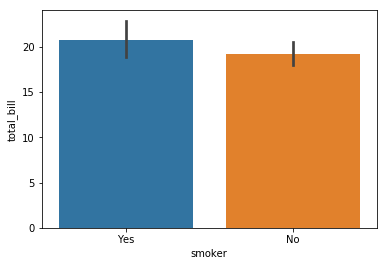

In [21]:
sns.barplot(x='smoker', y='total_bill', data=data)

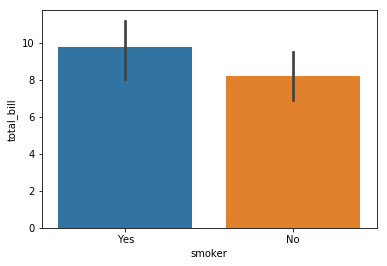

In [22]:
sns.barplot(x='smoker', y='total_bill', data=data, estimator=np.std)

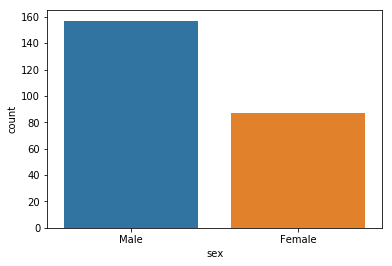

In [23]:
sns.countplot(x='sex', data=data)

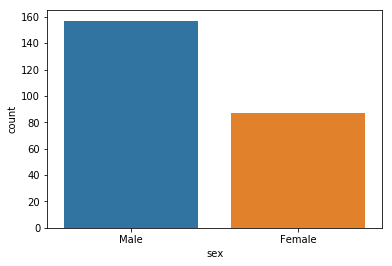

In [24]:
sns.countplot(data['sex'])

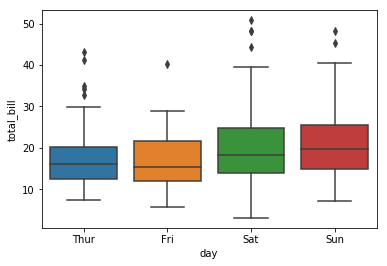

In [25]:
sns.boxplot(x='day', y='total_bill', data=data)

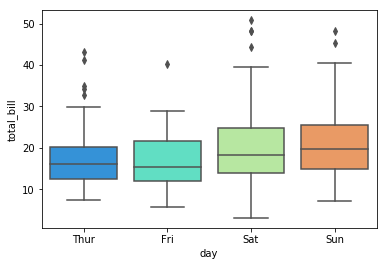

In [26]:
sns.boxplot(x='day', y='total_bill', data=data, palette='rainbow')

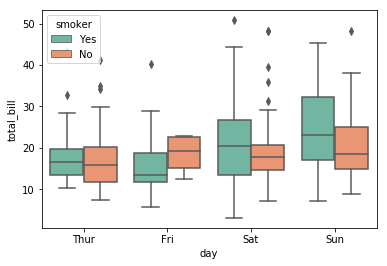

In [27]:
sns.boxplot(x='day', y='total_bill', data=data, palette='Set2', hue='smoker')

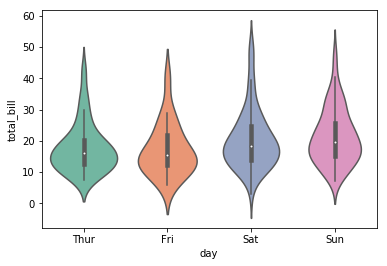

In [28]:
sns.violinplot(x='day', y='total_bill', data=data, palette='Set2')

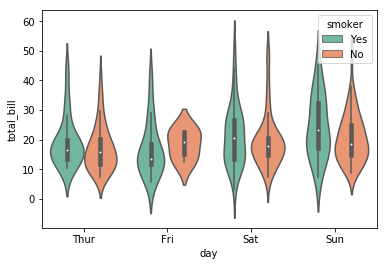

In [29]:
sns.violinplot(x='day', y='total_bill', data=data, palette='Set2', hue='smoker')

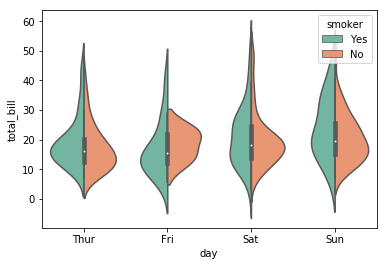

In [30]:
sns.violinplot(x='day', y='total_bill', data=data, palette='Set2', hue='smoker', split=True)

### 05. Matrix Plot

In [31]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


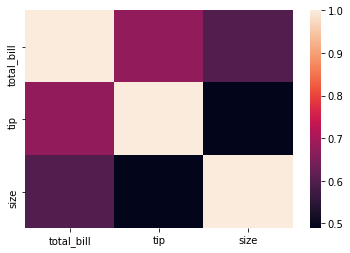

In [32]:
sns.heatmap(data.corr())

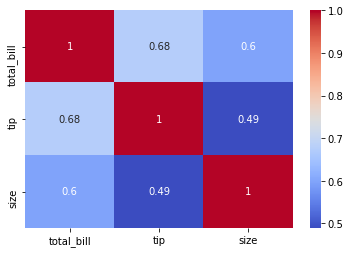

In [33]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [34]:
data = sns.load_dataset('flights')

data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [35]:
pivot_df = data.pivot_table(values='passengers', index='month', columns='year')

pivot_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


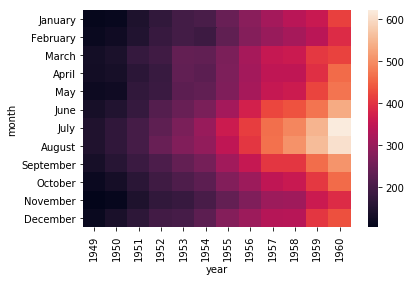

In [36]:
sns.heatmap(pivot_df)

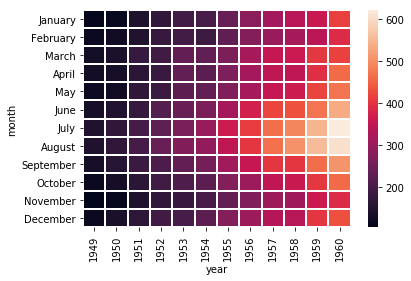

In [37]:
sns.heatmap(pivot_df, linewidths=1)

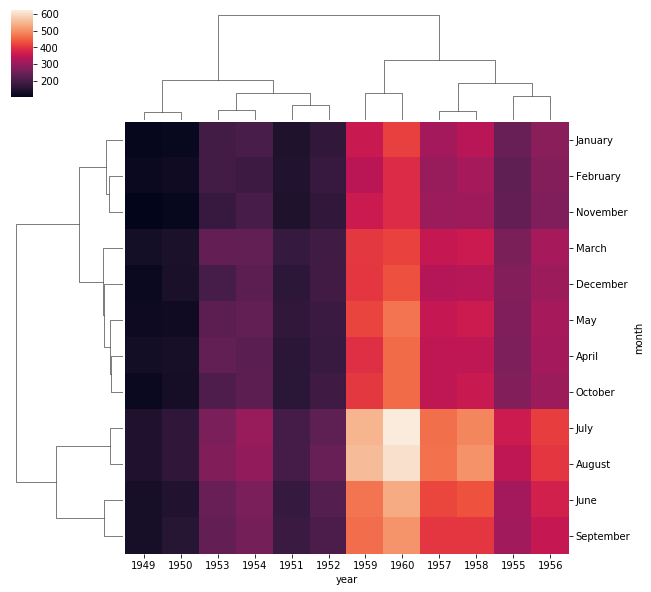

In [38]:
sns.clustermap(pivot_df)

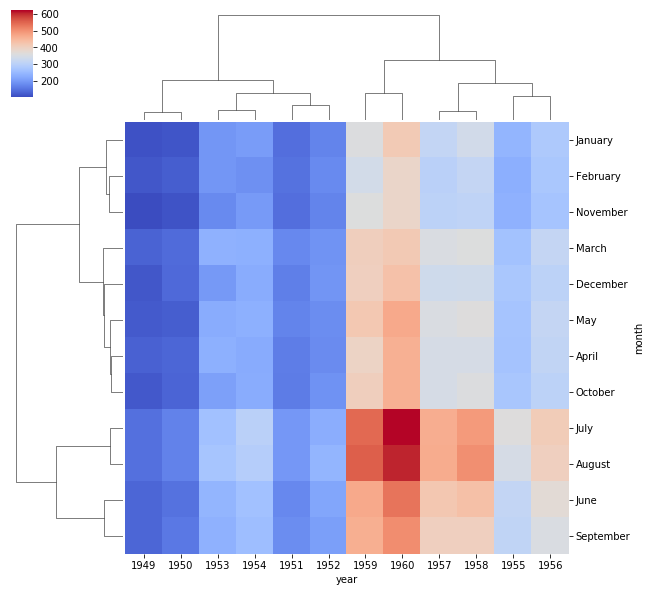

In [39]:
sns.clustermap(pivot_df, cmap='coolwarm')

### 06. Grid Plot

In [40]:
data = sns.load_dataset('iris')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


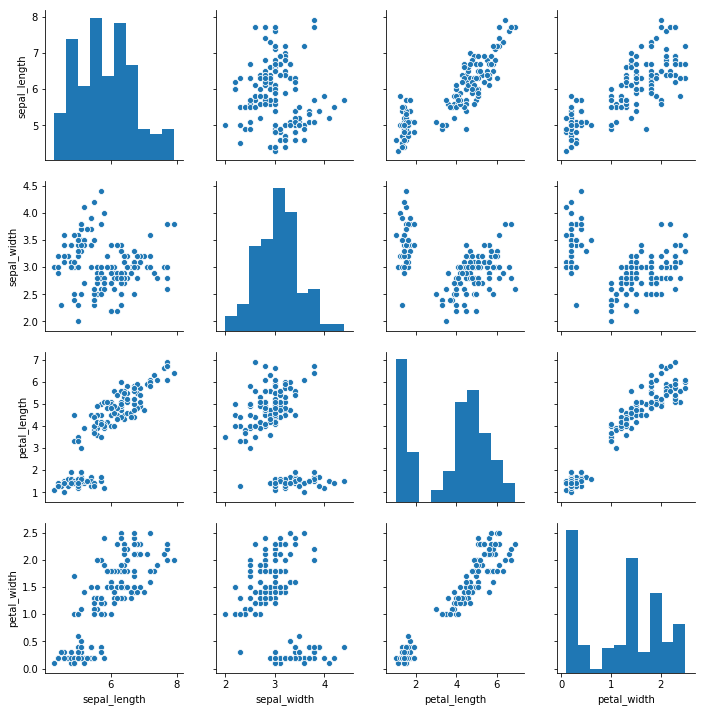

In [41]:
sns.pairplot(data)

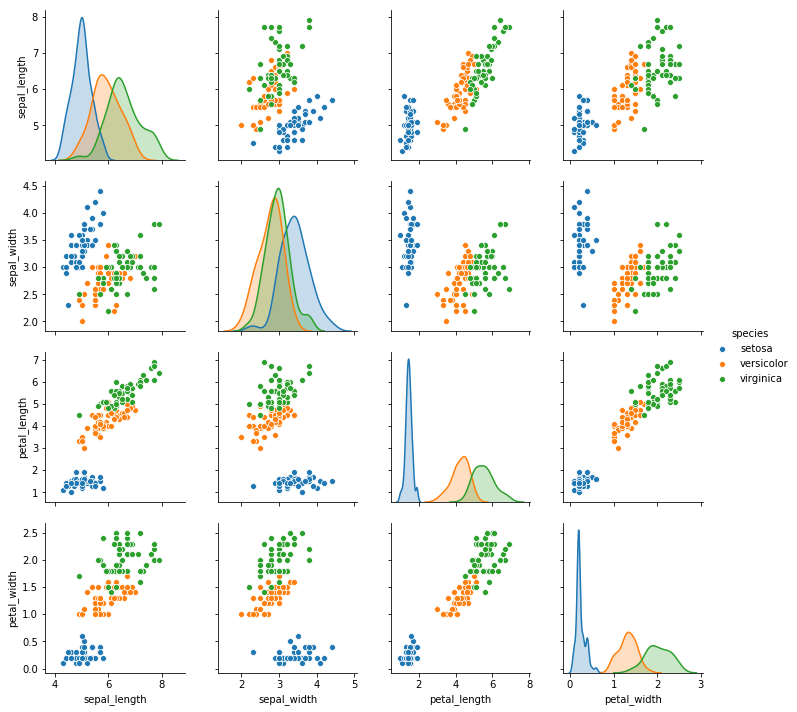

In [42]:
sns.pairplot(data, hue='species')

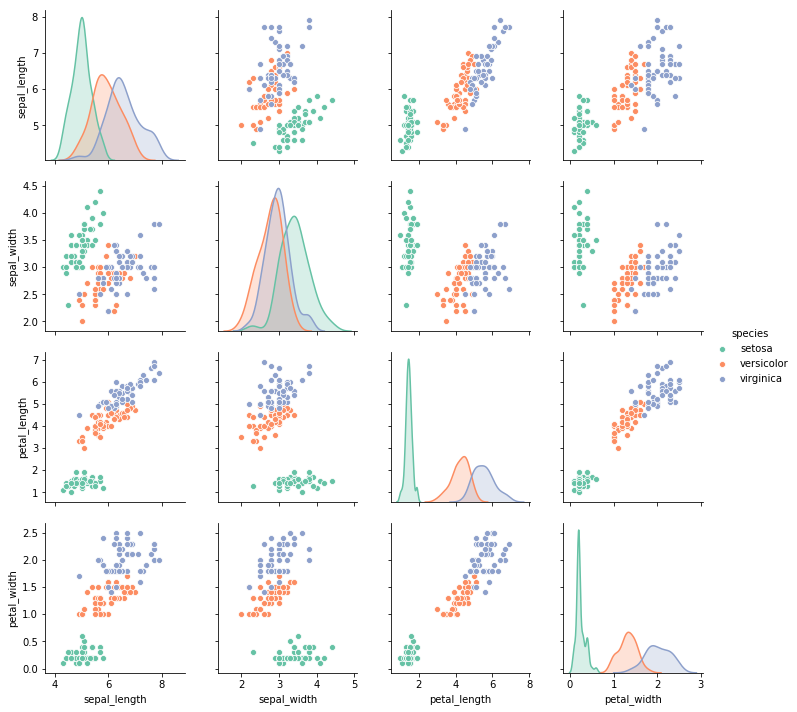

In [43]:
sns.pairplot(data, hue='species', palette='Set2')

In [44]:
data = sns.load_dataset('tips')

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

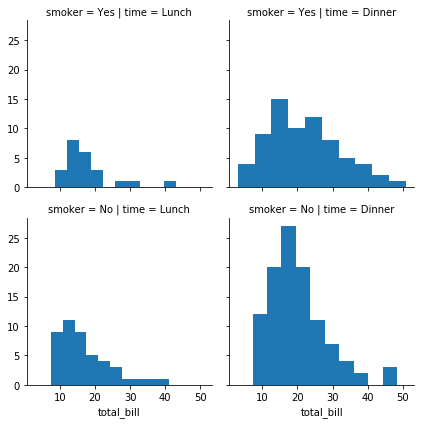

In [46]:
g = sns.FacetGrid(data, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

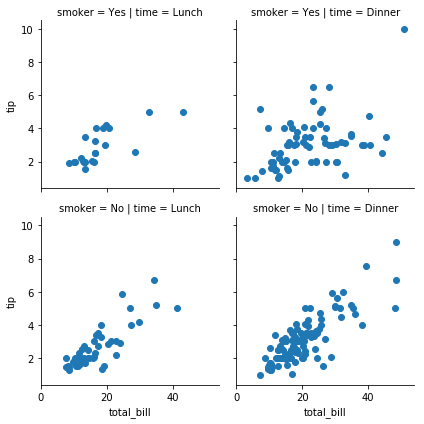

In [47]:
g = sns.FacetGrid(data, col='time', row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip')

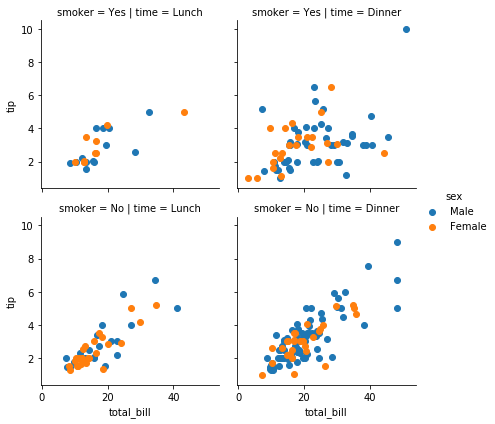

In [48]:
g = sns.FacetGrid(data, col='time', row='smoker', hue='sex')
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend()

### 07. Regression Plot

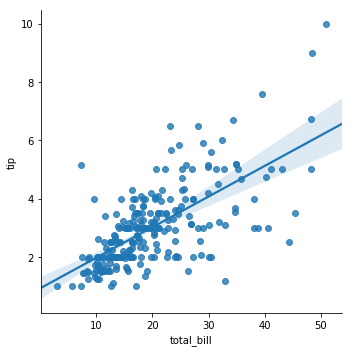

In [49]:
sns.lmplot(x='total_bill', y='tip', data=data)

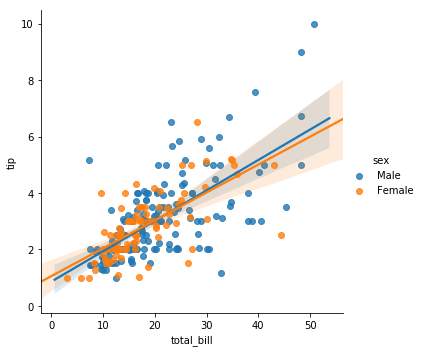

In [50]:
sns.lmplot(x='total_bill', y='tip', data=data, hue='sex')

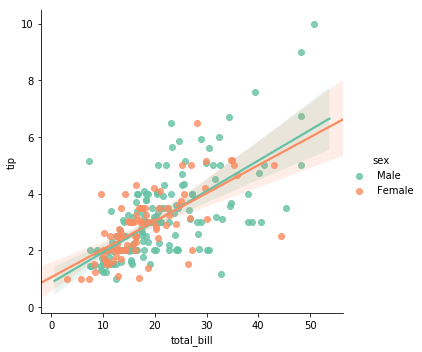

In [51]:
sns.lmplot(x='total_bill', y='tip', data=data, hue='sex', palette='Set2')

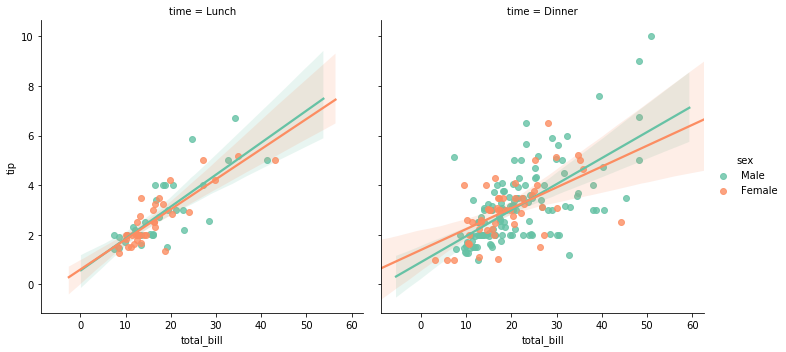

In [52]:
sns.lmplot(x='total_bill', y='tip', data=data, hue='sex', palette='Set2', col='time')

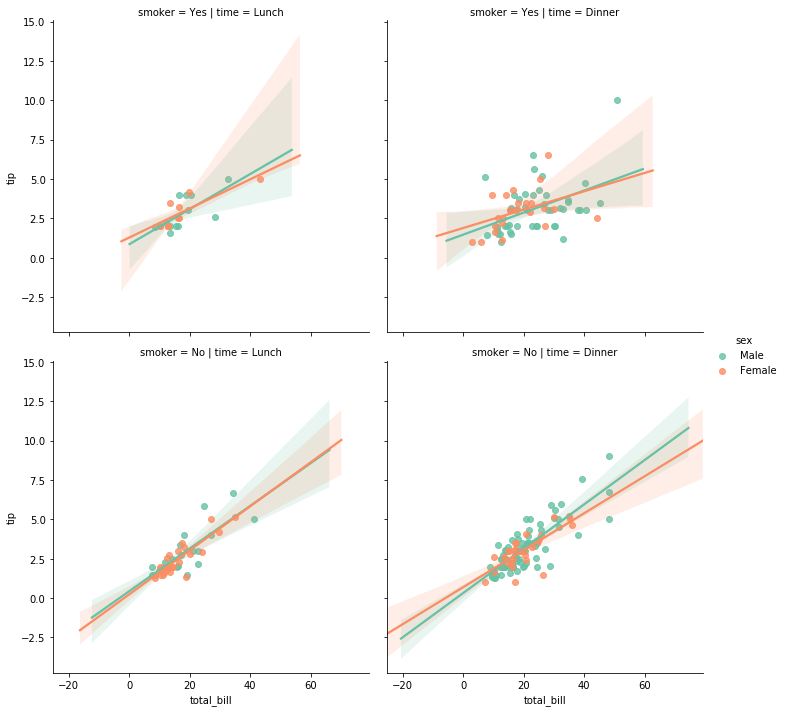

In [53]:
sns.lmplot(x='total_bill', y='tip', data=data, hue='sex', palette='Set2', col='time', row='smoker')